In [2]:
import os, sys
import numpy as np
sys.path.append('/Users/nam4/Desktop/')#'/home/nam4/Desktop/sandbox/')
import pygp as gpy
import matplotlib.pyplot as plt
%matplotlib inline

# Sine Function

In [3]:
oracle = lambda x: np.sin(x) 

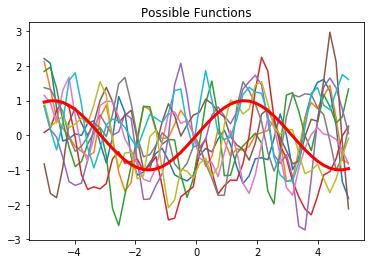

In [4]:
k = gpy.kernel.Gaussian(sigma_l=0.3, sigma_n=0.001, sigma_f=1.0)
x_prior = np.linspace(-5,5,50).reshape(-1,1)
gp = gpy.gaussian_process.GaussianProcess(x_prior=x_prior, kernel=k)

priors = gp.prior(10)
for pr in range(priors.shape[1]):
    plt.plot(x_prior, priors[:,pr])
plt.plot(x_prior, [oracle(x) for x in x_prior], 'r', lw=3)
plt.title('Possible Functions')

In [5]:
train = gpy.training.ucb_training(gp, 
             x_bounds={'x':(-5.0,5.0)}, 
             latent_function=oracle, 
             n_warm_ups=3,
             delta=0.5, 
             budget_per_epoch=3, 
             n_epochs=4, 
             k_split=5, 
            optimize_kwargs={'method':'SLSQP',
                             'bounds':{'sigma_l':[1.0e-9,20.], 'sigma_n':[1.0e-9, 1.0e-4], 'sigma_f':[1.0e-9,20.0]}})

In [19]:
try:
    results_log, param_log, cv_log = train.next()

    epoch, count = results_log[-1][0], results_log[-1][1]
    mu, std = results_log[-1][2], results_log[-1][3]

    plt.figure()
    n_std = 2
    plt.gca().fill_between(gp.x_prior.flat, mu-n_std*std, mu+n_std*std, color="#dddddd")
    plt.plot(gp.history['x'], gp.history['y'], 'k*')
    plt.axvline(gp.history['x'][-1])
    plt.plot(x_prior, mu, 'k--')
    plt.plot(np.linspace(-5,5,100), [oracle(x) for x in np.linspace(-5,5,100)], 'r', label='Oracle')
    plt.legend(bbox_to_anchor=(1,1))
    plt.title('After Epoch {}, count {}'.format(1+epoch, 1+count))
except Exception as e:
    print e

In [20]:
results_log

[[0, 0, array([ -8.01920579e-11,  -4.89462924e-09,  -1.88071469e-07,
          -4.54940302e-06,  -6.92795080e-05,  -6.64155343e-04,
          -4.00828133e-03,  -1.52291268e-02,  -3.64259475e-02,
          -5.48486307e-02,  -5.19923872e-02,  -3.10268272e-02,
          -1.16563053e-02,  -2.75682797e-03,  -4.12007253e-04,
          -7.71094941e-05,  -6.08386586e-04,  -5.98599402e-03,
          -3.72156957e-02,  -1.45661014e-01,  -3.58906562e-01,
          -5.56721347e-01,  -5.43545176e-01,  -3.32812114e-01,
          -1.18049806e-01,   2.60868848e-02,   1.83760623e-01,
           4.11323608e-01,   6.55077500e-01,   8.60576133e-01,
           9.67034759e-01,   8.37136544e-01,   4.98716091e-01,
           1.93109834e-01,   4.75729100e-02,   7.40303705e-03,
           7.26020152e-04,   4.48391614e-05,   1.74355127e-06,
           4.26824669e-08,   6.57797219e-10,   6.38195956e-12,
           3.89797224e-14,   1.49880429e-16,   3.62807812e-19,
           5.52881690e-22,   5.30397708e-25,   3.

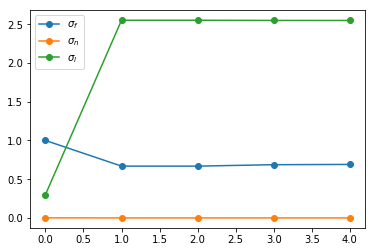

In [21]:
plt.figure()
plt.plot([k.parameters['sigma_f']]+[param_log[i]['sigma_f'] for i in range(len(param_log))], 'o-', label=r'$\sigma_f$')
plt.plot([k.parameters['sigma_n']]+[param_log[i]['sigma_n'] for i in range(len(param_log))], 'o-', label=r'$\sigma_n$')
plt.plot([k.parameters['sigma_l']]+[param_log[i]['sigma_l'] for i in range(len(param_log))], 'o-', label=r'$\sigma_l$')
plt.legend(loc='best')

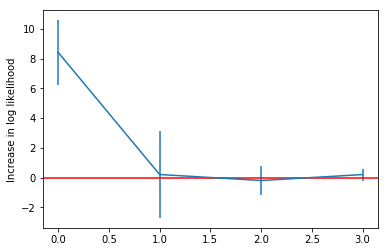

In [22]:
plt.figure()
plt.errorbar(np.arange(len(cv_log)), 
             [float(x['current'][0])-float(x['last'][0]) for x in cv_log], 
             yerr=[float(x['current'][1])+float(x['last'][1]) for x in cv_log]) # error is additive?
plt.ylabel('Increase in log likelihood')
plt.gca().axhline(0, c='r')

# Shifted Sine

In [23]:
oracle = lambda x: np.sin(x) + 2.0 # shift off center

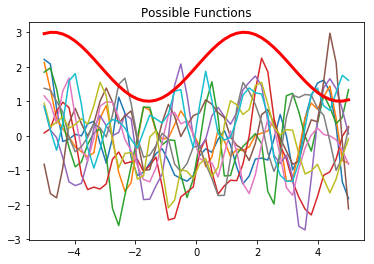

In [24]:
k = gpy.kernel.Gaussian(sigma_l=0.3, sigma_n=0.001, sigma_f=1.0)
x_prior = np.linspace(-5,5,50).reshape(-1,1)
gp = gpy.gaussian_process.GaussianProcess(x_prior=x_prior, kernel=k)

priors = gp.prior(10)
for pr in range(priors.shape[1]):
    plt.plot(x_prior, priors[:,pr])
plt.plot(x_prior, [oracle(x) for x in x_prior], 'r', lw=3)
plt.title('Possible Functions')

In [25]:
train = gpy.training.ucb_training(gp, 
             x_bounds={'x':(-5.0,5.0)}, 
             latent_function=oracle, 
             n_warm_ups=3,
             delta=0.5, 
             budget_per_epoch=3, 
             n_epochs=4, 
             k_split=5, 
            optimize_kwargs={'method':'SLSQP',
                             'bounds':{'sigma_l':[1.0e-9,20.], 'sigma_n':[1.0e-9, 1.0e-4], 'sigma_f':[1.0e-9,20.0]}})

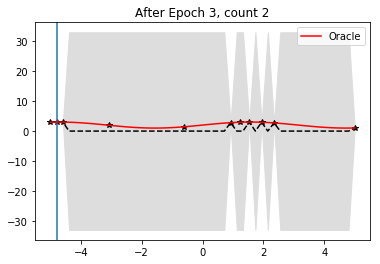

In [33]:
try:
    results_log, param_log, cv_log = train.next()

    epoch, count = results_log[-1][0], results_log[-1][1]
    mu, std = results_log[-1][2], results_log[-1][3]

    plt.figure()
    n_std = 2
    plt.gca().fill_between(gp.x_prior.flat, mu-n_std*std, mu+n_std*std, color="#dddddd")
    plt.plot(gp.history['x'], gp.history['y'], 'k*')
    plt.axvline(gp.history['x'][-1])
    plt.plot(x_prior, mu, 'k--')
    plt.plot(np.linspace(-5,5,100), [oracle(x) for x in np.linspace(-5,5,100)], 'r', label='Oracle')
    plt.legend(bbox_to_anchor=(1,1))
    plt.title('After Epoch {}, count {}'.format(1+epoch, 1+count))
except Exception as e:
    print e

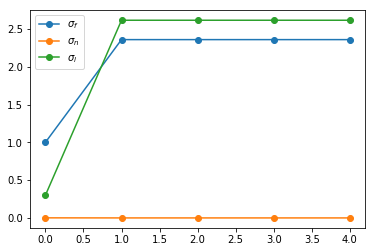

In [37]:
plt.figure()
plt.plot([k.parameters['sigma_f']]+[param_log[i]['sigma_f'] for i in range(len(param_log))], 'o-', label=r'$\sigma_f$')
plt.plot([k.parameters['sigma_n']]+[param_log[i]['sigma_n'] for i in range(len(param_log))], 'o-', label=r'$\sigma_n$')
plt.plot([k.parameters['sigma_l']]+[param_log[i]['sigma_l'] for i in range(len(param_log))], 'o-', label=r'$\sigma_l$')
plt.legend(loc='best')

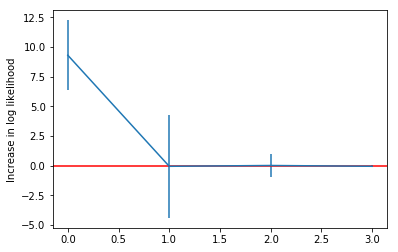

In [38]:
plt.figure()
plt.errorbar(np.arange(len(cv_log)), 
             [float(x['current'][0])-float(x['last'][0]) for x in cv_log], 
             yerr=[float(x['current'][1])+float(x['last'][1]) for x in cv_log]) # error is additive?
plt.ylabel('Increase in log likelihood')
plt.gca().axhline(0, c='r')

# Shift Sine Further

In [34]:
oracle = lambda x: np.sin(x) + 10.0 # shift off center

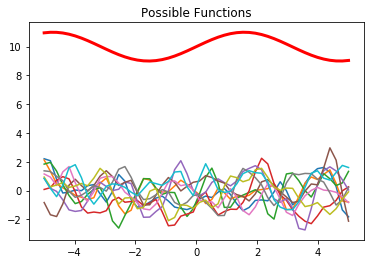

In [35]:
k = gpy.kernel.Gaussian(sigma_l=0.3, sigma_n=0.001, sigma_f=1.0)
x_prior = np.linspace(-5,5,50).reshape(-1,1)
gp = gpy.gaussian_process.GaussianProcess(x_prior=x_prior, kernel=k)

priors = gp.prior(10)
for pr in range(priors.shape[1]):
    plt.plot(x_prior, priors[:,pr])
plt.plot(x_prior, [oracle(x) for x in x_prior], 'r', lw=3)
plt.title('Possible Functions')

In [36]:
train = gpy.training.ucb_training(gp, 
             x_bounds={'x':(-5.0,5.0)}, 
             latent_function=oracle, 
             n_warm_ups=3,
             delta=0.5, 
             budget_per_epoch=3, 
             n_epochs=4, 
             k_split=5, 
            optimize_kwargs={'method':'SLSQP',
                             'bounds':{'sigma_l':[1.0e-9,20.], 'sigma_n':[1.0e-9, 1.0e-4], 'sigma_f':[1.0e-9,20.0]}})

/Users/nam4/anaconda/envs/idp/lib/python2.7/site-packages/numpy/core/numeric.py:1154: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis,:], out)
/Users/nam4/anaconda/envs/idp/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Failed to optimize kernel : Traceback (most recent call last):
  File "/Users/nam4/Desktop/pygp/training.py", line 142, in ucb_training
    opt_params, opt_res = gp.optimize_kernel(**optimize_kwargs)
  File "/Users/nam4/Desktop/pygp/gaussian_process.py", line 374, in optimize_kernel
    **optimize_kwargs)
  File "/Users/nam4/anaconda/envs/idp/lib/python2.7/site-packages/scipy/optimize/_minimize.py", line 458, in minimize
    constraints, callback=callback, **options)
  File "/Users/nam4/anaconda/envs/idp/lib/python2.7/site-packages/scipy/optimize/slsqp.py", line 413, in _minimize_slsqp
    slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw)
error: failed in converting 8th argument `g' of _slsqp.slsqp to C/Fortran array



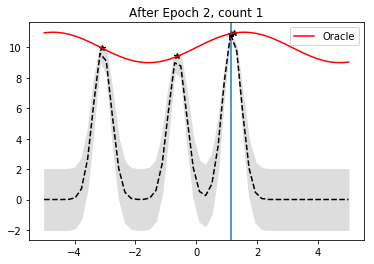

In [40]:
try:
    results_log, param_log, cv_log = train.next()

    epoch, count = results_log[-1][0], results_log[-1][1]
    mu, std = results_log[-1][2], results_log[-1][3]

    plt.figure()
    n_std = 2
    plt.gca().fill_between(gp.x_prior.flat, mu-n_std*std, mu+n_std*std, color="#dddddd")
    plt.plot(gp.history['x'], gp.history['y'], 'k*')
    plt.axvline(gp.history['x'][-1])
    plt.plot(x_prior, mu, 'k--')
    plt.plot(np.linspace(-5,5,100), [oracle(x) for x in np.linspace(-5,5,100)], 'r', label='Oracle')
    plt.legend(bbox_to_anchor=(1,1))
    plt.title('After Epoch {}, count {}'.format(1+epoch, 1+count))
except Exception as e:
    print e

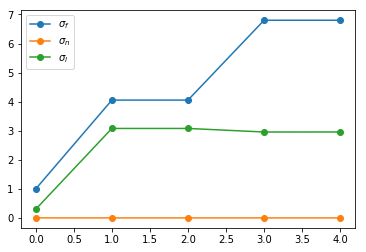

In [58]:
plt.figure()
plt.plot([k.parameters['sigma_f']]+[param_log[i]['sigma_f'] for i in range(len(param_log))], 'o-', label=r'$\sigma_f$')
plt.plot([k.parameters['sigma_n']]+[param_log[i]['sigma_n'] for i in range(len(param_log))], 'o-', label=r'$\sigma_n$')
plt.plot([k.parameters['sigma_l']]+[param_log[i]['sigma_l'] for i in range(len(param_log))], 'o-', label=r'$\sigma_l$')
plt.legend(loc='best')

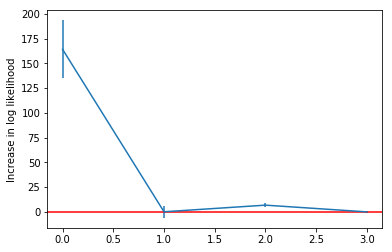

In [59]:
plt.figure()
plt.errorbar(np.arange(len(cv_log)), 
             [float(x['current'][0])-float(x['last'][0]) for x in cv_log], 
             yerr=[float(x['current'][1])+float(x['last'][1]) for x in cv_log]) # error is additive?
plt.ylabel('Increase in log likelihood')
plt.gca().axhline(0, c='r')

# Line

In [29]:
oracle = lambda x: 2*x+3

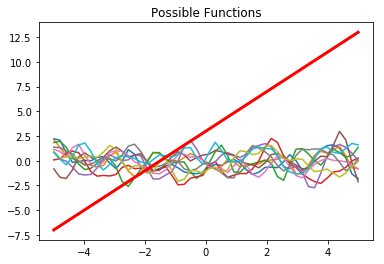

In [30]:
k = gpy.kernel.Gaussian(sigma_l=0.3, sigma_n=0.001, sigma_f=1.0)
x_prior = np.linspace(-5,5,50).reshape(-1,1)
gp = gpy.gaussian_process.GaussianProcess(x_prior=x_prior, kernel=k)

priors = gp.prior(10)
for pr in range(priors.shape[1]):
    plt.plot(x_prior, priors[:,pr])
plt.plot(x_prior, [oracle(x) for x in x_prior], 'r', lw=3)
plt.title('Possible Functions')

In [31]:
train = gpy.training.ucb_training(gp, 
             x_bounds={'x':(-5.0,5.0)}, 
             latent_function=oracle, 
             n_warm_ups=3,
             delta=0.5, 
             budget_per_epoch=3, 
             n_epochs=4, 
             k_split=5, 
            optimize_kwargs={'method':'SLSQP',
                             'bounds':{'sigma_l':[1.0e-9,20.], 'sigma_n':[1.0e-9, 1.0e-4], 'sigma_f':[1.0e-9,20.0]}})

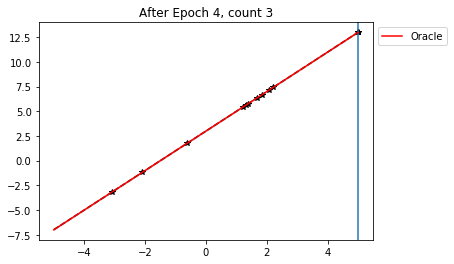

In [44]:
try:
    results_log, param_log, cv_log = train.next()

    epoch, count = results_log[-1][0], results_log[-1][1]
    mu, std = results_log[-1][2], results_log[-1][3]

    plt.figure()
    n_std = 2
    plt.gca().fill_between(gp.x_prior.flat, mu-n_std*std, mu+n_std*std, color="#dddddd")
    plt.plot(gp.history['x'], gp.history['y'], 'k*')
    plt.axvline(gp.history['x'][-1])
    plt.plot(x_prior, mu, 'k--')
    plt.plot(np.linspace(-5,5,100), [oracle(x) for x in np.linspace(-5,5,100)], 'r', label='Oracle')
    plt.legend(bbox_to_anchor=(1,1))
    plt.title('After Epoch {}, count {}'.format(1+epoch, 1+count))
except Exception as e:
    print e

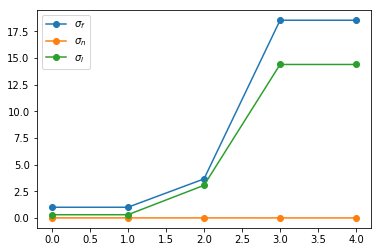

In [57]:
plt.figure()
plt.plot([k.parameters['sigma_f']]+[param_log[i]['sigma_f'] for i in range(len(param_log))], 'o-', label=r'$\sigma_f$')
plt.plot([k.parameters['sigma_n']]+[param_log[i]['sigma_n'] for i in range(len(param_log))], 'o-', label=r'$\sigma_n$')
plt.plot([k.parameters['sigma_l']]+[param_log[i]['sigma_l'] for i in range(len(param_log))], 'o-', label=r'$\sigma_l$')
plt.legend(loc='best')

In [79]:
# plt.figure()
# plt.errorbar([0,4], 
#              [float(x['current'][0])-float(x['last'][0]) for x in cv_log if x['current'][0] is not None], 
#              yerr=[float(x['current'][1])+float(x['last'][1]) for x in cv_log if x['current'][0] is not None]) # error is additive?
# plt.ylabel('Increase in log likelihood')
# plt.gca().axhline(0, c='r')

# Polynomial

In [58]:
oracle = lambda x: 0.3*x**3 -2*x**2 + 3*x + 2

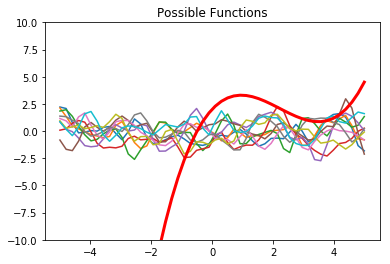

In [59]:
k = gpy.kernel.Gaussian(sigma_l=0.3, sigma_n=0.001, sigma_f=1.0)
x_prior = np.linspace(-5,5,50).reshape(-1,1)
gp = gpy.gaussian_process.GaussianProcess(x_prior=x_prior, kernel=k)

priors = gp.prior(10)
for pr in range(priors.shape[1]):
    plt.plot(x_prior, priors[:,pr])
plt.plot(x_prior, [oracle(x) for x in x_prior], 'r', lw=3)
plt.ylim(-10,10)
plt.title('Possible Functions')

In [60]:
train = gpy.training.ucb_training(gp, 
             x_bounds={'x':(-5.0,5.0)}, 
             latent_function=oracle, 
             n_warm_ups=3,
             delta=0.5, 
             budget_per_epoch=3, 
             n_epochs=4, 
             k_split=5, 
            optimize_kwargs={'method':'SLSQP',
                             'bounds':{'sigma_l':[1.0e-9,20.], 'sigma_n':[1.0e-9, 1.0e-4], 'sigma_f':[1.0e-9,20.0]}})

In [76]:
try:
    results_log, param_log, cv_log = train.next()

    epoch, count = results_log[-1][0], results_log[-1][1]
    mu, std = results_log[-1][2], results_log[-1][3]

    plt.figure()
    n_std = 2
    plt.gca().fill_between(gp.x_prior.flat, mu-n_std*std, mu+n_std*std, color="#dddddd")
    plt.plot(gp.history['x'], gp.history['y'], 'k*')
    plt.axvline(gp.history['x'][-1])
    plt.plot(x_prior, mu, 'k--')
    plt.plot(np.linspace(-5,5,100), [oracle(x) for x in np.linspace(-5,5,100)], 'r', label='Oracle')
    plt.legend(bbox_to_anchor=(1,1))
    plt.title('After Epoch {}, count {}'.format(1+epoch, 1+count))
except Exception as e:
    print e

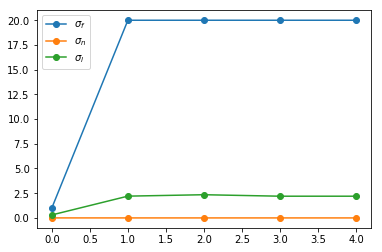

In [77]:
plt.figure()
plt.plot([k.parameters['sigma_f']]+[param_log[i]['sigma_f'] for i in range(len(param_log))], 'o-', label=r'$\sigma_f$')
plt.plot([k.parameters['sigma_n']]+[param_log[i]['sigma_n'] for i in range(len(param_log))], 'o-', label=r'$\sigma_n$')
plt.plot([k.parameters['sigma_l']]+[param_log[i]['sigma_l'] for i in range(len(param_log))], 'o-', label=r'$\sigma_l$')
plt.legend(loc='best')

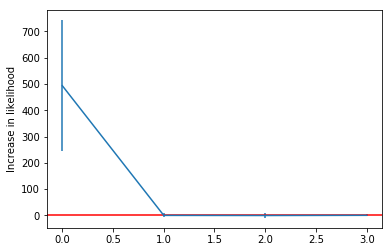

In [78]:
plt.figure()
plt.errorbar(np.arange(len(cv_log)), 
             [float(x['current'][0])-float(x['last'][0]) for x in cv_log], 
             yerr=[float(x['current'][1])+float(x['last'][1]) for x in cv_log]) # error is additive?
plt.ylabel('Increase in likelihood')
plt.gca().axhline(0, c='r')

# Multidimensional

In [2]:
def oracle(x):
    return np.sin(np.sqrt(x[0]**2+x[1]**2))

<IPython.core.display.Javascript object>


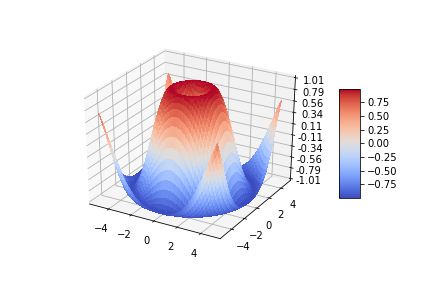

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

<IPython.core.display.Javascript object>


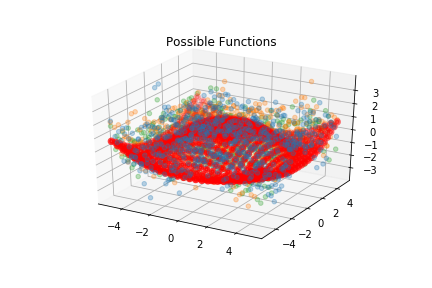

In [14]:
# k = gpy.kernel.Gaussian(sigma_l=0.3, sigma_n=0.001, sigma_f=1.0)
k = gpy.kernel.GaussianARD(sigma_1=0.3, sigma_2=0.3,
                           sigma_n=0.001, sigma_f=1.0)
xv = np.linspace(-5,5,25)
yv = np.linspace(-5,5,25)
x_prior = np.array([[x,y] for x in xv for y in yv])
gp = gpy.gaussian_process.GaussianProcess(x_prior=x_prior, kernel=k)

priors = gp.prior(3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for pr in range(priors.shape[1]):
    ax.scatter(x_prior[:,0], x_prior[:,1], priors[:,pr], alpha=0.3)
ax.scatter(x_prior[:,0], x_prior[:,1], [oracle(x) for x in x_prior], c='red', lw=3)
plt.title('Possible Functions')

## Consider if we just sampled randomly (i.e. no active learning)

<IPython.core.display.Javascript object>


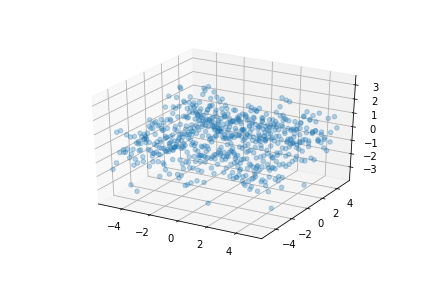

<IPython.core.display.Javascript object>


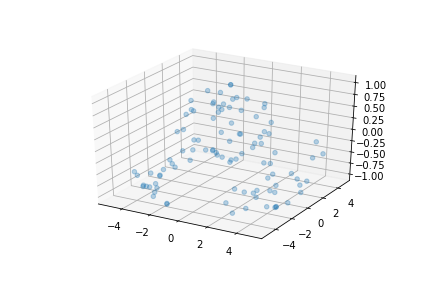

In [15]:
batch=100 #1000
x_obs = np.random.rand(batch*2).reshape(batch,2)*10-5
y_obs = np.array([oracle(x) for x in x_obs]).reshape(-1,1)
mu, std, post = gp.posterior(x_observed=x_obs, y_observed=y_obs, n=1, save=False, use_history=False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_prior[:,0], x_prior[:,1], post[:,0], alpha=0.3)

fig = plt.figure()
plt.title('Using {}')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_obs[:,0], x_obs[:,1], y_obs[:,0], alpha=0.3)

## vs. Training

In [16]:
def plot_3d_progress(gp, mu, std, n_std=2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(gp.x_prior[:,0].reshape(-1,25), 
                           gp.x_prior[:,1].reshape(-1,25),
                           mu.reshape(-1,25), cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    surf = ax.plot_surface(gp.x_prior[:,0].reshape(-1,25), 
                           gp.x_prior[:,1].reshape(-1,25),
                           (mu+n_std*std).reshape(-1,25), cmap=cm.viridis,
                           linewidth=0, antialiased=False, alpha=0.2)
    surf = ax.plot_surface(gp.x_prior[:,0].reshape(-1,25), 
                           gp.x_prior[:,1].reshape(-1,25),
                           (mu-n_std*std).reshape(-1,25), cmap=cm.viridis,
                           linewidth=0, antialiased=False, alpha=0.2)
    ax.scatter(gp.history['x'][:,0], gp.history['x'][:,1], gp.history['y'], c='k', label='Sampled')
    ax.plot([gp.history['x'][:,0][-1]]*2, 
            [gp.history['x'][:,1][-1]]*2, 
            [-2,2], 'k--', alpha=0.8, linewidth=2, label='Last Choice')

    plt.legend(bbox_to_anchor=(1.1,1))
    plt.title('After Epoch {}, count {}'.format(1+epoch, 1+count))

In [18]:
train = gpy.training.ucb_training(gp, 
             x_bounds={'x':(-5.0,5.0), 'y':(-5.0,5.0)}, 
             latent_function=oracle, 
             n_warm_ups=10,
             delta=0.5, 
             budget_per_epoch=3, 
             n_epochs=4, 
             k_split=5, 
            optimize_kwargs={'method':'SLSQP',
                             'bounds':{'sigma_1':[1.0e-9,20.], 
                                       'sigma_2':[1.0e-9,20.], 
                                       'sigma_n':[1.0e-9, 1.0e-4], 
                                       'sigma_f':[1.0e-9,20.0]}})

In [32]:
try:
    results_log, param_log, cv_log = train.next()
except Exception as e:
    print e
else:
    epoch, count = results_log[-1][0], results_log[-1][1]
    mu, std = results_log[-1][2], results_log[-1][3]
    plot_3d_progress(gp, mu, std, 3)

## Visualize

<IPython.core.display.Javascript object>


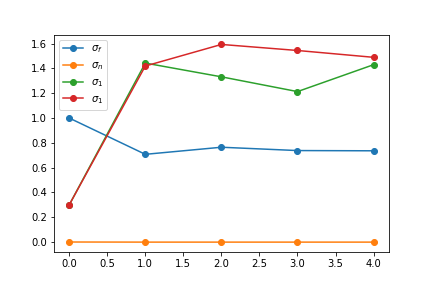

In [34]:
plt.figure()
plt.plot([k.parameters['sigma_f']]+[param_log[i]['sigma_f'] for i in range(len(param_log))], 'o-', label=r'$\sigma_f$')
plt.plot([k.parameters['sigma_n']]+[param_log[i]['sigma_n'] for i in range(len(param_log))], 'o-', label=r'$\sigma_n$')
plt.plot([k.parameters['sigma_1']]+[param_log[i]['sigma_1'] for i in range(len(param_log))], 'o-', label=r'$\sigma_1$')
plt.plot([k.parameters['sigma_2']]+[param_log[i]['sigma_2'] for i in range(len(param_log))], 'o-', label=r'$\sigma_1$')
plt.legend(loc='best')

<IPython.core.display.Javascript object>


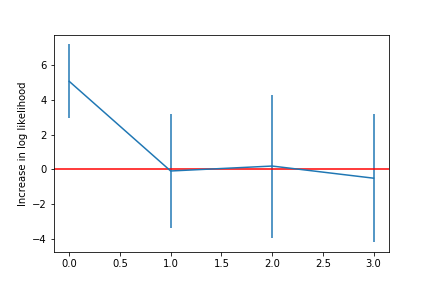

In [35]:
plt.figure()
plt.errorbar(np.arange(len(cv_log)), 
             [float(x['current'][0])-float(x['last'][0]) for x in cv_log], 
             yerr=[float(x['current'][1])+float(x['last'][1]) for x in cv_log]) # error is additive?
plt.ylabel('Increase in log likelihood')
plt.gca().axhline(0, c='r')